In [10]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.4 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy scikit-learn openpyxl


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 9.0 MB/s eta 0:00:012
     |████████████████████████████████| 301 kB 15.7 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import openpyxl
# test_1.xlsxを読み込む
workbook = openpyxl.load_workbook("titanic.xlsx")
sheet = workbook["in"]
flag = "Survived"

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#sl_df = pd.read_csv(workbook)#csvファイル
xlsx_file = "titanic.xlsx"  # XLSXファイル
sl_df = pd.read_excel(xlsx_file)

# 特徴量とターゲット変数
X = sl_df.drop(columns=[flag])
y = sl_df[flag]


# 数値データのカラム
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# カテゴリカルデータのカラム
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 前処理パイプライン
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)


np.set_printoptions(threshold=np.inf)
print("coefficient=", clf.named_steps['classifier'].coef_)  # 傾き
print("intercept=", clf.named_steps['classifier'].intercept_)  # 切片

print("Train score: ", clf.score(X_train, y_train))
print("Test score: ", clf.score(X_test, y_test))

coefficient= [[-0.94260129 -0.6378609  -0.35674612 -0.09596798  0.13205979 -0.0948755
   0.62205435 -0.25905399  0.1095115  -0.09091445  0.40653783 -0.20334128
  -0.32899108  0.13733538  0.58874754  0.39232929 -0.06597397  0.6002057
   0.69053465  0.73485582  0.85629677 -0.07615267  0.7396411  -0.05840363
  -0.07149562  0.6909021  -0.05606024  0.4475617   0.7198217  -0.09597556
   0.69782949  0.21276959 -0.05982087 -0.06412647  0.64739703  0.4636904
   0.51172538 -0.05971191  0.44823062  0.20575722 -0.03328202  0.68755856
   0.46733213  0.29897376 -0.55759468  0.40768897  0.05002927  0.02743781
   0.07776941  0.15970912 -0.59383189 -0.56726745  0.11044363 -0.76637447
   0.22380408  0.23069721  0.19130933  0.17219685  0.137367    0.02047248
   0.04422938 -0.6623268   0.05789309  0.16290389 -0.3763757  -0.48095871
   0.23782797  0.17951343  0.08507198  0.04291119  0.08479704  0.33862363
  -0.59387099  0.27424789  0.30544064  0.27388257  0.0453107  -0.65271171
  -0.60891623  0.1609705  -0

In [5]:
print(X.columns)

Index(['Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


In [6]:
clf.fit(X_train, y_train)

# 特徴量の名前
feature_names = numeric_features + categorical_features

# モデルの係数
coefficients = clf.named_steps['classifier'].coef_

# 係数と特徴量名
coef_list = []
for feat_name, coef in zip(feature_names, coefficients[0]):
    coef_list.append((feat_name, coef))

In [7]:
#順位
coef_list_sorted = sorted(coef_list, key=lambda x: x[1], reverse=True)

print("Coefficients and corresponding features (sorted in ascending order):")
i = 0
for feat_name, coef in coef_list_sorted:
    i += 1
    print(i,"位",feat_name, ": ", coef)

Coefficients and corresponding features (sorted in ascending order):
1 位 Sex :  0.6220543486621223
2 位 Fare :  0.13205978724122078
3 位 Name :  -0.09487550130215681
4 位 Parents/Children Aboard :  -0.09596797715136227
5 位 Siblings/Spouses Aboard :  -0.356746120385049
6 位 Age :  -0.6378609042441954
7 位 Pclass :  -0.9426012911517627


PassengerId 乗客ごとの一意の識別子（番号）。データセット内でのインデックスのような役割を果たします。
Survived 生存情報を表します。 • 0: 亡くなった • 1: 生存した
Pclass 乗客のチケットクラス（客室の等級）を表します。 • 1: ファーストクラス（1等） • 2: セカンドクラス（2等） • 3: サードクラス（3等）
Name 乗客の名前。
Sex 乗客の性別。 • male: 男性 • female: 女性
Age 乗客の年齢。数値で記録されています。
SibSp 乗船していた兄弟姉妹や配偶者の人数を表します。 • 例: 1なら兄弟または配偶者が1人。
Parch 乗船していた親や子供の人数を表します。 • 例: 0なら親や子供はいない。
Ticket チケット番号を表します。アルファベットと数字が含まれます。
Fare チケット料金（運賃）を示します。数値で表され、通貨単位はポンドです。
Cabin 客室番号を示します。空白の場合は客室番号が不明です。
Embarked 乗船した港を示します。 • C: Cherbourg（シェルブール） • Q: Queenstown（クイーンズタウン） • S: Southampton（サウサンプトン）

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# モデルを使ってテストデータに対して予測を行う
y_pred = clf.predict(X_test)

# 混同行列
print('Confusion matrix:\n', confusion_matrix(y_true=y_test, y_pred=y_pred))

# 正解率
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=y_pred))

# 適合率
print('Precision:', precision_score(y_true=y_test, y_pred=y_pred))

# 再現率
print('Recall:', recall_score(y_true=y_test, y_pred=y_pred))

# F1スコア
print('F1 score:', f1_score(y_true=y_test, y_pred=y_pred))

Confusion matrix:
 [[101  16]
 [ 21  40]]
Accuracy: 0.7921348314606742
Precision: 0.7142857142857143
Recall: 0.6557377049180327
F1 score: 0.6837606837606838


Matplotlib is building the font cache; this may take a moment.


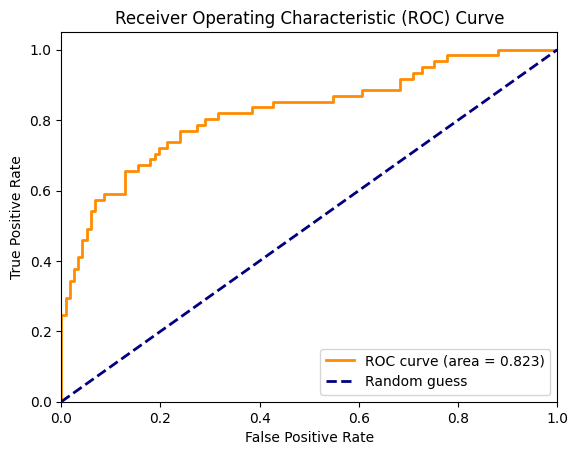

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# モデルを使ってテストデータに対して確率を予測する
y_score = clf.predict_proba(X_test)[:, 1]

# ROC曲線を計算する
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

# AUCを計算する
roc_auc = auc(fpr, tpr)

# ROC曲線をプロットする
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2, label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
